# Report

## Setup

In [3]:
import pickle
import pandas as pd
import altair as alt

from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\doree\anaconda3\envs\datascience\lib\site-packages\sklearn\utils\_param_validation.py)

## 1 Introduction and data

> REMOVE THE FOLLOWING TEXT

This section includes an introduction to the project motivation, data, and research question.
Describe the data and definitions of key variables.

It should also include some exploratory data analysis.

All of the EDA won't fit in the paper, so focus on the EDA for the response variable and a few other interesting variables and relationships.

### 1.1 Introduction and Motivation

For our project we have chosen a dataset about the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in southern California. 

Dalmatian toadflax was introduced to North America in the 1800s, presumably as ornamental plants and for use in fabrics and folk remedies. The species is now widespread in large parts of the USA and Canada. A lack of natural enemies is seen as one reason why plant species become invasive pests when they are introduced into areas outside their original 
range. Due to its extensive root system and prolific seed production, it can thrive and spread rapidly in a variety of ecosystems, including grasslands and roadsides. 

Invasive plants such as Dalmatian toadflax can cause ecological problems. On the one hand, it can displace native plants and as a result reduce biodiversity. It can also have an impact on the availability of habitat for native animals as the dominance of Dalmatian toadflax can disrupt the strucutre and function of ecosystems. On the other hand, we have to think of the soil composition. Invasive plants can alter the soil by removing nutrients which can have an impact on the native vegetation. Moreover, Dalmatian toadflax can tend to accumulate dry material, which can increase fire hazard.

Therefore, attempts are being made to control the spread of Dalmatian toadflax. During the 1950s-1960s studies with herbicides have been conducted. Because of the variable responses, differenct herbicides have been recommended e.g. borate-chlorate mixtures, different acids or silvex. In addition, the use of adapted grasses in competition with toadflax was also investigated.
However, the studies concluded that chemical control alone is not practical for large infestations and emphasized the need for integrated control strategies that take into account both chemical and ecological factors.
Other studies have investigated the effect of prescribed fires on the spread of Dalmatian toadflax. However, these studies also concluded that fire does not reduce populations of Dalmatian toadflax.

Nowadays, biological control using herbivorous insects such as Mecinus janthiniformis is the most promising method of controlling invasive weeds in a long-term, cost-effective and sustainable way.
These insects can infest plants, seeds, roots, leaves and stems. Continuous effect and permanent control, as well as the good combination with other control methods and the self-spreading, but also long-term and environmentally friendly nature are just some of the advantages that should be mentioned.
However, studies and tests on the success of these natural control agents are very cost-intensive and time-consuming.
Nevertheless, the advantages outweigh the disadvantages, which is why the use of herbivorous insects to control invasive plants is widespread today.

In our case, weevil Mecinus janthiniformis populations were released in the investigated area of southern California.
We aim to find patterns and trends within the dataset and define factors and potential predictors associated with the growth of Dalmatian toadflax and the spread of weevil populations.

**References**

Jacobs, J. S., & Sheley, R. L. (2003). Prescribed fire effects on dalmation toadflax. Rangeland Ecology & Management/Journal of Range Management Archives, 56(2), 193-197.: https://journals.uair.arizona.edu/index.php/jrm/article/download/9791/9403

Robocker, W. C. (1968). Control of Dalmation Toadflax. Rangeland Ecology & Management/Journal of Range Management Archives, 21(2), 94-98.: https://journals.uair.arizona.edu/index.php/jrm/article/viewFile/5580/5190

Sing, S. E., De Clerck-Floate, R. A., Hansen, R. W., Pearce, H., Randall, C. B., Toševski, I., & Ward, S. M. (2016). Biology and biological control of Dalmatian and yellow toadflax (p. 141). Morgantown, West Virginia: USDA Forest Service, Forest Health Technology Enterprise Team.: https://www.fs.usda.gov/rm/pubs_journals/2016/rmrs_2016_sing_s001.pdf

Willden, S. A., & Evans, E. W. (2019). Summer development and survivorship of the weed biocontrol agent, Mecinus janthiniformis (Coleoptera: Curculionidae), within stems of its host, Dalmatian toadflax (Lamiales: Plantaginaceae), in Utah. Environmental entomology, 48(3), 533-539.


https://www.sciencedirect.com/science/article/abs/pii/S1049964421001031

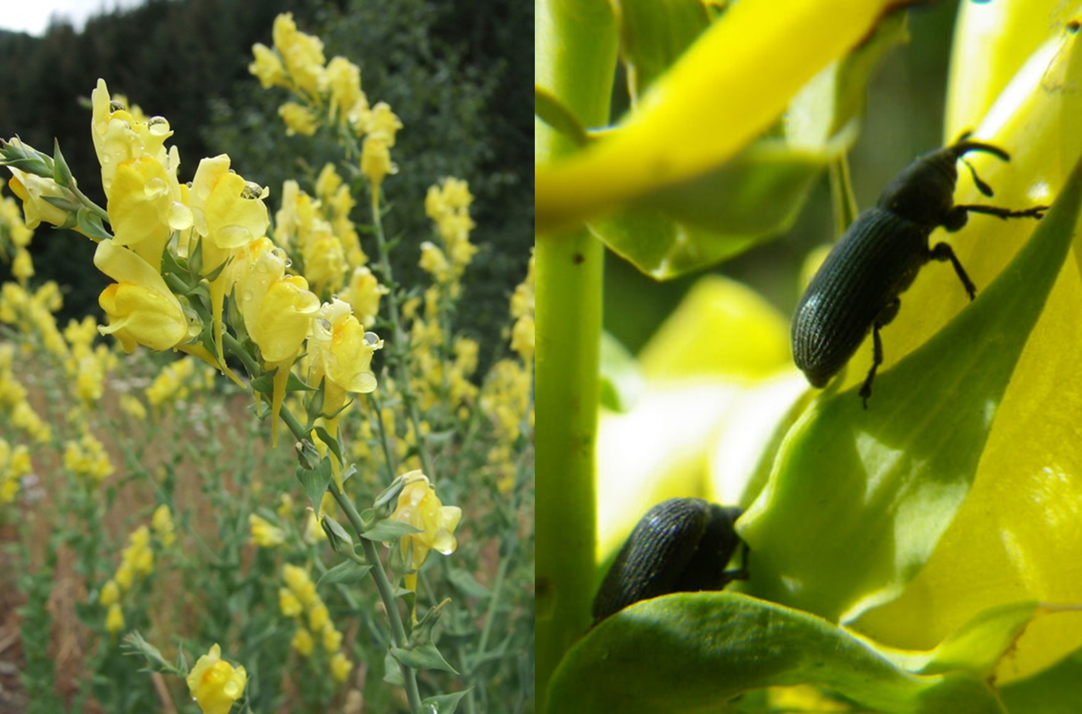

https://th.bing.com/th/id/R.24af516e80c20935779cda26af0e4308?rik=58aaf3bx89q%2fBA&riu=http%3a%2f%2fwww.kingcounty.gov%2f%7e%2fmedia%2fenvironment%2fanimalsAndPlants%2fnoxious_weeds%2fimagesD_G%2fdalmatian_toadflax_flowers.ashx%3fla%3den&ehk=0owDL9xu%2bCPawaYi57sFS7YdjC%2baJkdT7wHpffLL5yw%3d&risl=&pid=ImgRaw&r=0

https://blog.invasive-species.org/wp-content/uploads/sites/6/2021/09/Mecinus-janthiniformus-Gary-Chang-2-1024x576.jpg

### 1.2 Research Questions and Hypothesis

**Linear Regression:**

We want to identify patterns and trends within our dataset and define factors or potential predictors associated with the growth of Dalmatian toadflax. Our model aims to predict the main stem length of Dalmatian toadflax based on different traits.

**Logistic Regression:**

For the logistic regression we want to predict, if a plant is infested by weevil populations or not. Therefore, we use different predictor variables and try to identify which characteristics of a plant are most likely to indicate a possible infestation.

Our **hypothesis** is that the spread of weevil populations contributes to the reduction of Dalmatian toadflax vegetation in the area and reduces the size of the plants. 

If it turns out that weevil cultivation does indeed influence the containment of the spread, this could serve as a basis for the decision to increase the use of herbivorous insects such as Mecinus janthiniformis to control the growth of Dalmatian toadflax.

### 1.3 Data Origin

The dataset was originally collected by Lincoln Smith starting in 2008 and published by the Agricultural Research Service (Department of Agriculture). 

Every year an observational study was conducted on six different sites within the investigated area with approximately 7-78 observations per site and year. The plants were collected, examined, measured and dissected in the labratory. Each observation in the datasets represents a plant in the investigated area.

Link to the data source: https://catalog.data.gov/dataset/data-from-release-and-establishment-of-the-weevil-mecinus-janthiniformis-for-biological-co

### 1.4 Data Dictionary

Let´s fist take a look at the metadata. We want to get a brief overview of the data in our "df". We can see there are 25 variables. The description, role, type and format of each variable in our DataFrame can be taken from the following table:

In [4]:
meta = pd.read_excel('../data/raw/metadata_dictionary.xlsx')
meta

,Name,Description,Role,Type,Format
0,year,year that stems were infested,-,numeric,int64
1,diss date,date dissected in the laboratory,-,numeric,object
2,date,date collected in the field,-,numeric,object
3,site,six study sites at Hungry Valley study area,Predictor,nominal,object
4,trt,release or not in 2008 and 2014,-,nominal,object
5,BC,"1 = early establishment, 0 = late establishment",-,nominal,int64
6,stem #,stem ID,ID,numeric,int64
7,stem diam bottom (mm),diameter of stem at bottom,Predictor,numeric,float64
8,main stem length (cm),"length of stem, excluding side branches","Predictor, response",numeric,float64
9,total meja,"sum of no. empty chambers, dead larvae, dead p...",Predictor,numeric,int64


### 1.5 Definition of Key Variables

Describe the data and definitions of key variables.

Forward Selection?

### 1.6 Highlights from EDA

It should also include some exploratory data analysis.

All of the EDA won't fit in the paper, so focus on the EDA for the response variable and a few other interesting variables and relationships.

## 2 Methodology

> REMOVE THE FOLLOWING TEXT

This section includes a brief description of your modeling process.

Explain the reasoning for the type of model you're fitting, predictor variables considered for the model.

Additionally, show how you arrived at the final model by describing the model selection process, variable transformations (if needed), assessment of conditions and diagnostics, and any other relevant considerations that were part of the model fitting process.

### 2.1 Data Correction and Imputation

Wie haben wir die Daten preapriert und vorbereitet

Imputation --> Vorgehen und Auswahl (die drei Möglichkeiten diskutieren?)

### 2.2 Linear Regression

- Welche Prädiktorvariablen haben wir gewählt und warum?
- Wie sind wir zum endgültigen Modell gekommen?
- Modellauswahl und Variablenauswahl beschreiben
- Alles was wir am Modell angepasst und probiert haben

### 2.3 Logistic Regression

Overfitting

verschiedene Tresholds

## 3 Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


- Unser finales Modell mit allen relevanten Statistiken und Modellgütekriterien
- Ergebnisse: Durch das Modell die Forschungsfragen und Hypothese beantworten


### 3.1 Linear Regression

### 3.2 Logistic Regression

- Precision / Recall --> Modell evaluieren

## 4 Discussion and Conclusion


> REMOVE THE FOLLOWING TEXT

In this section you'll include a summary of what you have learned about your research question along with statistical arguments supporting your conclusions.
In addition, discuss the limitations of your analysis and provide suggestions on ways the analysis could be improved.
Any potential issues pertaining to the reliability and validity of your data and appropriateness of the statistical analysis should also be discussed here.
Lastly, this section will include ideas for future work.

The study on the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in Southern California provides valuable insights into the complex interplay between invasive plant species, biological control agents and the environment.

### 4.1 Achievments

- Umgang mit fehlenden Daten --> Impuation

After inspecting at the data, we noticed that some rows were missing information. We decided to use imputation to fill in these gaps. Also, we made it possible to remove rows with missing data, which reduced our dataset by about half. It is hypothesized that a complete dataset might have yielded more significant insights.


- Umgang mit unbalanciertem Datenset --> Oversampling
- Feature Selection
- Evaluierung der Modelle


### 4.2 Limitations

- potentielle Verbesserungen durch vollständige Daten 
- Daten und Ergebnisse beziehen sich nur auf eine bestimmte Region sind evtl. nicht übertragbar
- Erfolg der Käfern auch abhängig von äußeren Faktoren wie Wetter, Umwelteinflüssem, etc. die nicht planbar und im Modell integrierbar sind


### 4.3 Analysis of the Results

#### 4.3.1 Linar Regression

The investigation into factors predicting the total main stem length of Dalmatian toadflax provides an opportunity to understand the key indicators of the plant's growth. This knowledge can contribute to the development of targeted strategies for managing and controlling Dalmatian toadflax populations in southern California.

The most powerful predictor variables found with forward selection are:

- stem_diam_bottom_in_cm
- diam_top_in_cm
- side_branches_in_cm
- meja_per_100_cm
- total_meja

With these variables our model is reaching a moderate performance with an r² value of 0.658.


- welcher Faktor war am einflussreichsten?

#### 4.3.2 Logistic Regression

The hypothesis that weevil populations contribute to the reduction of Dalmatian toadflax vegetation seems to be supported by the research questions. If plants infested by weevils are found to be more likely to remain smaller, this indicates a possible link between the presence of weevils and the suppression of Dalmatian toadflax growth. This result is consistent with the biological control strategy, which aims to reduce the impact of the invasive plant on the ecosystem.

The most powerful predictor variables found with forward selection are:

- main_stem_length_in_cm
- stem_diam_bottom_in_cm
- side_branches_in_cm
- diam_top_in_cm
- tip_of_stem_broken

With these variables, our model is doing really well and can correctly predict infestations 88% of the time.